### Mansi Saxena
### TASK 2 : **Prediction using Unsupervised Machine Learning**
####         *Basics of K-Means Clustering*

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Iris.csv",index_col="Id")
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
21,5.4,3.4,1.7,0.2,Iris-setosa
148,6.5,3.0,5.2,2.0,Iris-virginica
38,4.9,3.1,1.5,0.1,Iris-setosa
56,5.7,2.8,4.5,1.3,Iris-versicolor
58,4.9,2.4,3.3,1.0,Iris-versicolor


In [3]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


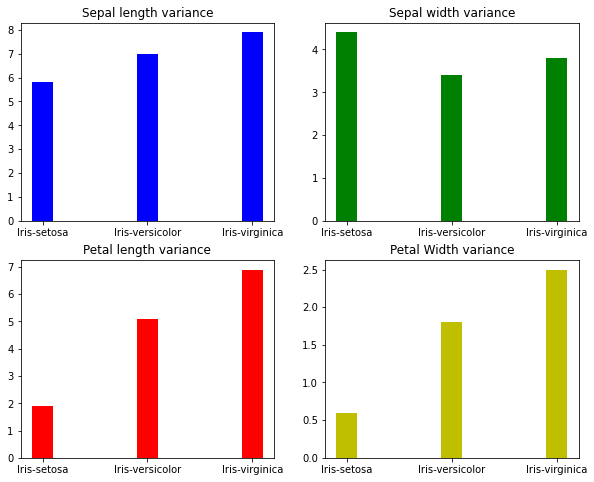

In [4]:
plt.figure(figsize=(10,8))
ax = plt.subplot(221)
ax.bar(df['Species'], df['SepalLengthCm'], width=0.2, color='b', align='center')
plt.title("Sepal length variance")

ax=plt.subplot(222)
ax.bar(df['Species'], df['SepalWidthCm'], width=0.2, color='g', align='center')
plt.title("Sepal width variance")

ax = plt.subplot(223)
ax.bar(df['Species'], df['PetalLengthCm'], width=0.2, color='r', align='center')
plt.title("Petal length variance")

ax = plt.subplot(224)
ax.bar(df['Species'], df['PetalWidthCm'], width=0.2, color='y', align='center')
plt.title("Petal Width variance")
plt.show()

In [5]:
from sklearn.cluster import KMeans
x=df.iloc[:,[0,1,2,3]].values
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(x)

KMeans(n_clusters=2)

In [6]:
# inertia on the fitted data
kmeans.inertia_

152.36870647733915

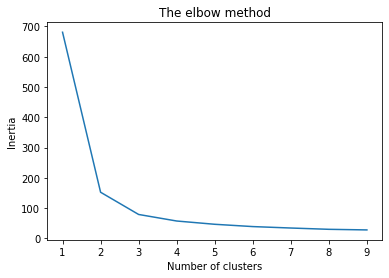

In [7]:
SSE = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    SSE.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 10),SSE)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia') # Within cluster sum of squares
plt.show()

In [8]:
# Applying kmeans to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
pred = kmeans.fit_predict(x)

In [9]:
frame = pd.DataFrame(x)
frame['cluster'] = pred
frame['cluster'].value_counts()


2    62
1    50
0    38
Name: cluster, dtype: int64

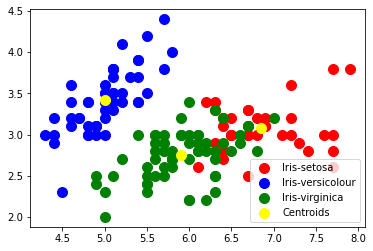

In [14]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(x[pred == 0, 0], x[pred == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[pred == 1, 0], x[pred == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[pred == 2, 0], x[pred == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()